# Manifold learning with Feature-type distributed clustering workflow is more informative compared to UMAP for tabular clinical datasets

## Importing necessary libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import tensorflow as tf
from tensorflow import keras
import umap.umap_ as umap
%config InlineBackend.figure_format = 'svg'


In [2]:
from fdc.fdc import feature_clustering
from fdc.fdc import FDC, Clustering
from fdc.fdc import canberra_modified
modified_can = canberra_modified
from fdc.clustering import *

from sklearn import metrics
from sklearn.metrics import pairwise_distances
from sklearn.metrics import silhouette_score
from cluster_val import *

## Importing pre-processed data

In [3]:
np.random.seed(42)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
data=pd.read_csv('heart_failure_clinical_records_dataset.csv')

In [4]:
np.random.seed(42)
data=data.sample(frac=1) #Shuffle the data set
np.random.seed(42)
i=[x for x in range(299)]

data.set_index(pd.Series(i), inplace=True)

In [5]:
data.drop('DEATH_EVENT',axis=1,inplace=True)

In [6]:
data.shape

(299, 12)

In [7]:
from fdc.fdc import feature_clustering
from fdc.fdc import FDC, Clustering
from fdc.fdc import canberra_modified
modified_can = canberra_modified
from fdc.clustering import *


## UMAP on original data

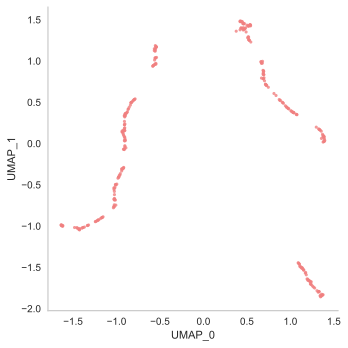

In [8]:
umap_emb=feature_clustering(15,0.1,'euclidean',data,True)

## Silhouette_score  and Dunn index for umap clusters extracted using K-means clustering

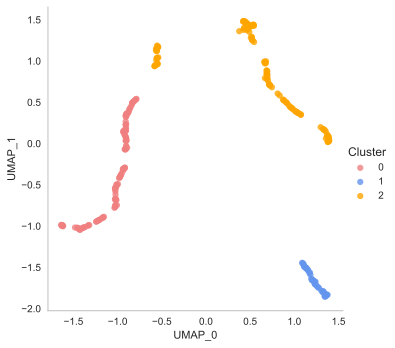

In [9]:
umap_clustering=Clustering(umap_emb,umap_emb,True)
umap_cluster_list,umap_cluster_counts=umap_clustering.K_means(3)

In [10]:
silhouette_score(umap_emb, umap_cluster_list, metric='euclidean')


0.7283107498506932

## Visualizing Silhouette score (you can also choose the number of clusters based on score)


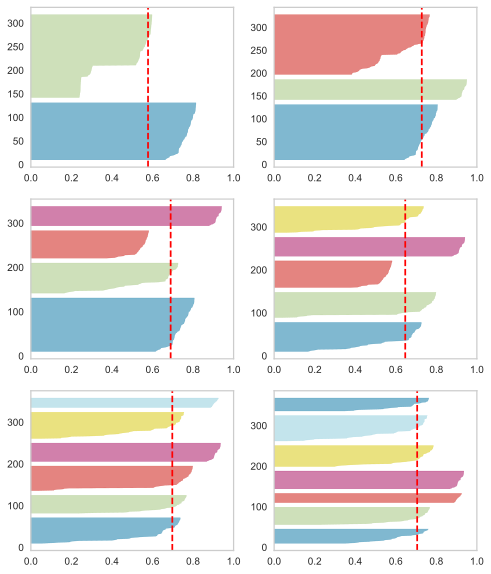

In [11]:
Silhouette_visual(umap_emb)

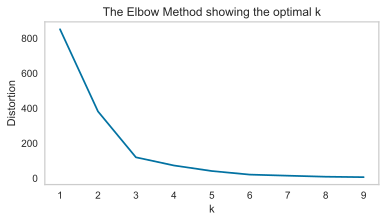

In [12]:
elbow_plot(umap_emb)

In [13]:
dunn_index(cluster_wise_df(umap_emb,umap_cluster_list))

0.6588094997721738

## Silhouette_score  and Dunn index for umap clusters extracted using Agglomerative clustering

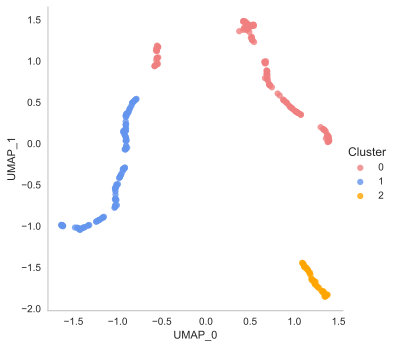

In [14]:
umap_cluster_list_agglo,umap_cluster_counts_agglo=umap_clustering.Agglomerative(3,'euclidean','ward')

In [15]:
silhouette_score(umap_emb, umap_cluster_list_agglo, metric='euclidean')

0.6938860634488252

In [16]:
dunn_index(cluster_wise_df(umap_emb,umap_cluster_list_agglo))

0.19627641062789752

## Silhouette_score  and Dunn index for umap clusters extracted using DBSCAN clustering

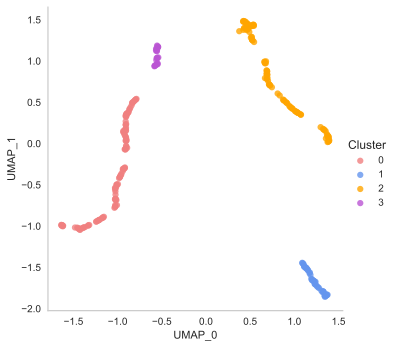

In [17]:
umap_cluster_list_dbscan,umap_cluster_counts_dbscan=umap_clustering.DBSCAN(0.8,20)

In [18]:
#removing noise indices from the embeddings
non_noise_indices= np.where(np.array(umap_cluster_list_dbscan)!=-1)
umap_emb= umap_emb.iloc[non_noise_indices]
#FDC_emb_low= FDC_emb_low.iloc[non_noise_indices]
umap_cluster_list_dbscan= np.array(umap_cluster_list_dbscan)[non_noise_indices]


In [19]:
silhouette_score(umap_emb, umap_cluster_list_dbscan, metric='euclidean')

0.7358600959478242

In [20]:
dunn_index(cluster_wise_df(umap_emb,umap_cluster_list_dbscan))

0.534617432259154

## Dividing features
- cont_list=continueous features
- ord_list=ordinal features



In [21]:
cont_list= ['age','creatinine_phosphokinase','ejection_fraction','platelets','serum_creatinine','serum_sodium','time']

ord_list= ['anaemia','diabetes','high_blood_pressure','sex','smoking']

In [22]:
len(ord_list)

5

In [23]:
len(cont_list)

7

## FDC on original data

In [24]:
from fdc.fdc import feature_clustering
from fdc.fdc import FDC, Clustering
from fdc.fdc import canberra_modified
modified_can = canberra_modified

FDC.normalize (init): 0.00000 / 0.000s
FDC.normalize (clustering CONT): 2.79688 / 2.797s
FDC.normalize (clustering ORD): 4.96875 / 7.766s
FDC.normalize (clustering NOM): 0.00000 / 7.766s
FDC.normalize (concat): 0.00000 / 7.766s
FDC.normalize (umap 5 -> 2): 3.15625 / 10.922s
FDC.normalize (array -> DataFrame): 0.01562 / 10.938s


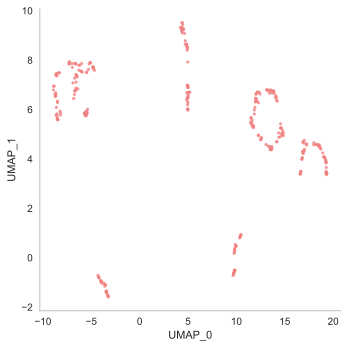

FDC.normalize (plotting): 2.82812 / 13.766s
FDC.normalize (array -> DataFrame): 0.00000 / 13.766s
FDC.normalize (total): 0.00000 / 13.766s


In [25]:

fdc = FDC(clustering_cont=Clustering('euclidean',15,0.1)
          , clustering_ord=Clustering(modified_can,15,0.1,max_components=1)
          , visual=True
          , use_pandas_output=True
          , with_2d_embedding=True
          )

fdc.selectFeatures(continueous=cont_list, ordinal=ord_list)

FDC_emb_high,FDC_emb_low = fdc.normalize(data,n_neighbors=15, min_dist=0.1,cont_list=cont_list,ord_list=ord_list,
                  with_2d_embedding=True,
                  visual=True)

## Silhouette_score  and Dunn index for fdc clusters (intermediate_dim) extracted using K-means clustering

In [26]:
FDC_emb_high

,CONT_UMAP_0,CONT_UMAP_1,ORD_UMAP_0
0,-0.785098,-1.342941,0.891679
1,1.399881,-1.384617,0.426009
2,0.682496,-0.283323,-0.497692
3,1.234236,-1.537697,0.496841
4,-0.826485,0.685673,-0.500958
...,...,...,...
294,-1.299086,-0.294573,-0.242273
295,-0.862262,-1.235889,0.720692
296,1.110282,1.149264,-1.702397
297,1.056885,1.076111,0.661526


In [27]:
from fdc.clustering import Clustering

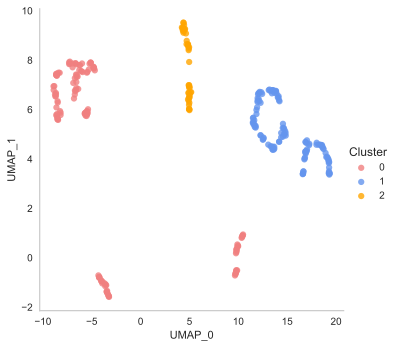

In [28]:
clustering=Clustering(FDC_emb_high,FDC_emb_low,True)
cluster_list,cluster_counts=clustering.K_means(3)

In [29]:
FDC_emb_high['Cluster'] = cluster_list

In [30]:
silhouette_score(FDC_emb_high, cluster_list, metric='euclidean')

0.45507207282877477

In [31]:
dunn_index(cluster_wise_df(FDC_emb_high,cluster_list))

0.212472907014913

## Visualizing Shilhouette score for low_dim fdc embedding


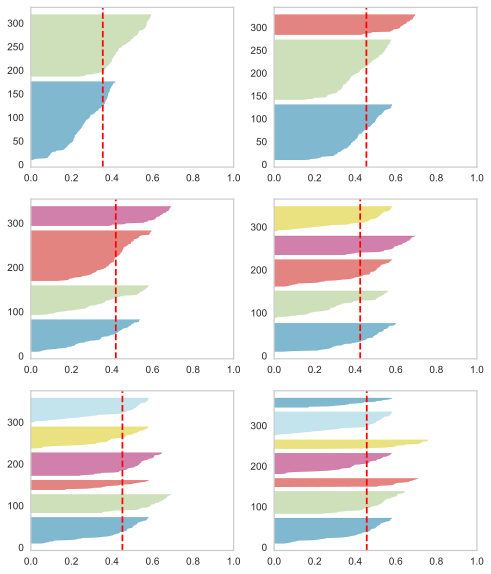

In [32]:
Silhouette_visual(FDC_emb_high)

## Elbow plot for low_dim fdc embedding


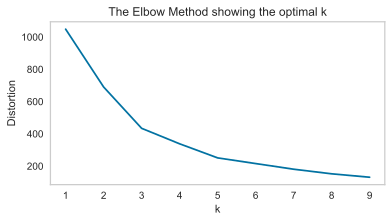

In [33]:
elbow_plot(FDC_emb_high)

## Silhouette_score  and Dunn index for fdc clusters (intermediate_dim) extracted using Agglomerative clustering

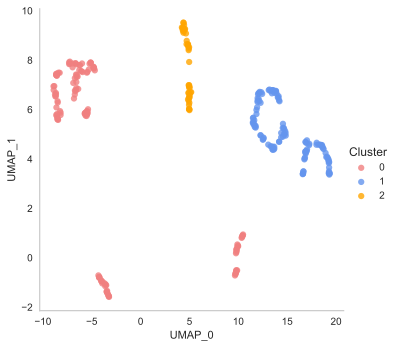

In [34]:
cluster_list_agglo,cluster_counts_agglo=clustering.Agglomerative(3,'euclidean','ward')

In [35]:
FDC_emb_high['Cluster'] = cluster_list_agglo

In [36]:
silhouette_score(FDC_emb_high, cluster_list_agglo, metric='euclidean')

0.45507207282877477

In [37]:
dunn_index(cluster_wise_df(FDC_emb_high,cluster_list_agglo))

0.212472907014913

## Silhouette_score  and Dunn index for fdc clusters (intermediate_dim) extracted using DBSCAN clustering

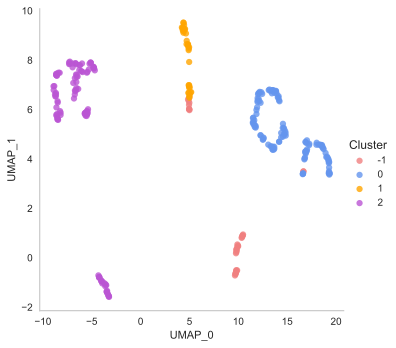

In [38]:
cluster_list_dbscan,cluster_counts_dbscan=clustering.DBSCAN(0.8,20)

In [39]:
FDC_emb_high['Cluster'] = cluster_list_dbscan

In [40]:
#removing noise indices from the embeddings
non_noise_indices= np.where(np.array(cluster_list_dbscan)!=-1)
FDC_emb_high= FDC_emb_high.iloc[non_noise_indices]
FDC_emb_low= FDC_emb_low.iloc[non_noise_indices]
cluster_list_dbscan= np.array(cluster_list_dbscan)[non_noise_indices]


In [41]:
silhouette_score(FDC_emb_high, cluster_list_dbscan, metric='euclidean')

0.5065888655424198

In [42]:
dunn_index(cluster_wise_df(FDC_emb_high,cluster_list_dbscan))

0.3227955138339812